In [7]:
import torch
import argparse
import random
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import albumentations

from torchsummary import summary as summary_

def unittest(test_type):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

    if test_type == 'model':
        fcn8s = CustomFCN8s(num_classes=24)
        fcn8s.to(device)
        summary_(fcn8s, (3, 224, 224), 16)

        fcn8s = CustomFCN16s(num_classes=24)
        fcn8s.to(device)
        summary_(fcn8s, (3, 224, 224), 16)

        fcn8s = CustomFCN32s(num_classes=24)
        fcn8s.to(device)
        summary_(fcn8s, (3, 224, 224), 16)

    elif test_type == 'data':
        train_path = 'train.json'
        
        elastic_dataset = RecycleTrashDataset(
            data_dir=train_path, 
            transform=albumentations.ElasticTransform(p=1, alpha=40, sigma=120 * 0.05, alpha_affine=120 * 0.03)
        )
        griddistortion_dataset = RecycleTrashDataset(
            data_dir=train_path, 
            transform=albumentations.GridDistortion(p=1)
        )
        contrast_dataset = RecycleTrashDataset(
            data_dir=train_path, 
            transform=albumentations.RandomContrast(p=1)
        )
        snow_dataset = RecycleTrashDataset(
            data_dir=train_path, 
            transform=albumentations.RandomSnow(p=1)
        )
        cutout_dataset = RecycleTrashDataset(
            data_dir=train_path, 
            transform=albumentations.Cutout(p=1)
        )
        coursedropout_dataset = RecycleTrashDataset(
            data_dir=train_path, 
            transform=albumentations.CoarseDropout(p=1)
        )
        gridshuffle_dataset = RecycleTrashDataset(
            data_dir=train_path, 
            transform=albumentations.RandomGridShuffle(p=1)
        )
        
        org_dataset = RecycleTrashDataset(data_dir=train_path)

        dataset_list = [
            org_dataset, elastic_dataset, griddistortion_dataset, 
            contrast_dataset, snow_dataset, cutout_dataset, coursedropout_dataset,
            gridshuffle_dataset,
        ]

        return dataset_list

In [8]:
if __name__ == '__main__':
    if __package__ is None:
        import sys
        from os import path
        print(path.dirname( path.dirname( path.abspath('__file__') ) ))
        sys.path.append(path.dirname( path.dirname( path.abspath('__file__') ) ))
        from src.model import CustomFCN8s, CustomFCN16s, CustomFCN32s
        from src.dataset import RecycleTrashDataset
    else:
        from ..src.model import CustomFCN8s, CustomFCN16s, CustomFCN32s
        from ..src.dataset import RecycleTrashDataset

/opt/ml/vim-hjk


In [9]:
dataset_list = unittest('data')
print('\n', len(dataset_list))

loading annotations into memory...
Done (t=5.64s)
creating index...
index created!
loading annotations into memory...
Done (t=3.61s)
creating index...
index created!
loading annotations into memory...
Done (t=3.40s)
creating index...
index created!
loading annotations into memory...
Done (t=5.97s)
creating index...
index created!
loading annotations into memory...
Done (t=3.47s)
creating index...
index created!
loading annotations into memory...
Done (t=3.17s)
creating index...
index created!
loading annotations into memory...
Done (t=7.03s)
creating index...
index created!
loading annotations into memory...
Done (t=3.32s)
creating index...
index created!

 8


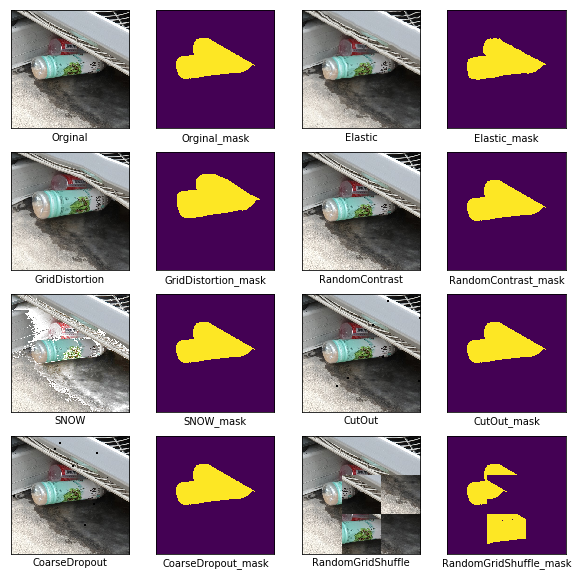

In [11]:
num = random.randint(0, 837)

fig = plt.figure(figsize=(10, 10))
rows = 4
cols = 4
i = 1

xlabels = [
    "xlabel", 
    "Orginal", "Orginal_mask", 
    "Elastic", "Elastic_mask",    
    "GridDistortion", "GridDistortion_mask",
    "RandomContrast", "RandomContrast_mask",
    "SNOW", "SNOW_mask",
    "CutOut", "CutOut_mask",
    "CoarseDropout", "CoarseDropout_mask",
    "RandomGridShuffle", "RandomGridShuffle_mask"
]

for dataset in dataset_list:
    try: img, mask, _, _ = dataset.__getitem__(num)    
    except: print((i - 1) // 2)
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img.astype(np.uint8))
    ax.set_xlabel(xlabels[i])
    ax.set_xticks([]), ax.set_yticks([])

    ax = fig.add_subplot(rows, cols, i + 1)
    ax.imshow(mask)
    ax.set_xlabel(xlabels[i + 1])
    ax.set_xticks([]), ax.set_yticks([])
    i += 2

plt.savefig('./savefig_default.png')
plt.show()

In [3]:
    unittest('model')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [16, 64, 224, 224]           1,792
              ReLU-2         [16, 64, 224, 224]               0
            Conv2d-3         [16, 64, 224, 224]          36,928
              ReLU-4         [16, 64, 224, 224]               0
         MaxPool2d-5         [16, 64, 112, 112]               0
         ConvBlock-6         [16, 64, 112, 112]               0
            Conv2d-7        [16, 128, 112, 112]          73,856
              ReLU-8        [16, 128, 112, 112]               0
            Conv2d-9        [16, 128, 112, 112]         147,584
             ReLU-10        [16, 128, 112, 112]               0
        MaxPool2d-11          [16, 128, 56, 56]               0
        ConvBlock-12          [16, 128, 56, 56]               0
           Conv2d-13          [16, 256, 56, 56]         295,168
             ReLU-14          [16, 256,

In [3]:
from torchsummary import summary as summary_
import torch

device = 'cuda:0'

model = torch.state ('../SETR_PUP_cityscapes_b8_80k.pth')
model.to(device)

summary_(model, (3, 100, 100), 8)

RuntimeError: [enforce fail at inline_container.cc:143] . PytorchStreamReader failed reading zip archive: failed finding central directory
frame #0: c10::ThrowEnforceNotMet(char const*, int, char const*, std::string const&, void const*) + 0x47 (0x7f4c87995d37 in /opt/conda/lib/python3.7/site-packages/torch/lib/libc10.so)
frame #1: caffe2::serialize::PyTorchStreamReader::valid(char const*, char const*) + 0x72 (0x7f4c8ab18b62 in /opt/conda/lib/python3.7/site-packages/torch/lib/libtorch.so)
frame #2: caffe2::serialize::PyTorchStreamReader::init() + 0xa1 (0x7f4c8ab1bb31 in /opt/conda/lib/python3.7/site-packages/torch/lib/libtorch.so)
frame #3: caffe2::serialize::PyTorchStreamReader::PyTorchStreamReader(std::string const&) + 0x64 (0x7f4c8ab1ec04 in /opt/conda/lib/python3.7/site-packages/torch/lib/libtorch.so)
frame #4: <unknown function> + 0x6c6536 (0x7f4cd2a4f536 in /opt/conda/lib/python3.7/site-packages/torch/lib/libtorch_python.so)
frame #5: <unknown function> + 0x295a74 (0x7f4cd261ea74 in /opt/conda/lib/python3.7/site-packages/torch/lib/libtorch_python.so)
frame #6: _PyMethodDef_RawFastCallDict + 0x24d (0x55d6477b1afd in /opt/conda/bin/python)
frame #7: _PyCFunction_FastCallDict + 0x21 (0x55d6477b1c81 in /opt/conda/bin/python)
frame #8: _PyObject_Call_Prepend + 0x63 (0x55d6477afb93 in /opt/conda/bin/python)
frame #9: PyObject_Call + 0x6e (0x55d6477a295e in /opt/conda/bin/python)
frame #10: <unknown function> + 0x9e443 (0x55d647719443 in /opt/conda/bin/python)
frame #11: _PyObject_FastCallKeywords + 0x128 (0x55d6477e7ca8 in /opt/conda/bin/python)
frame #12: _PyEval_EvalFrameDefault + 0x51d1 (0x55d64784c9a1 in /opt/conda/bin/python)
frame #13: _PyEval_EvalCodeWithName + 0x5da (0x55d64779059a in /opt/conda/bin/python)
frame #14: _PyFunction_FastCallDict + 0x1d5 (0x55d6477913e5 in /opt/conda/bin/python)
frame #15: _PyObject_Call_Prepend + 0x63 (0x55d6477afb93 in /opt/conda/bin/python)
frame #16: <unknown function> + 0x16c0aa (0x55d6477e70aa in /opt/conda/bin/python)
frame #17: _PyObject_FastCallKeywords + 0x128 (0x55d6477e7ca8 in /opt/conda/bin/python)
frame #18: _PyEval_EvalFrameDefault + 0x49b6 (0x55d64784c186 in /opt/conda/bin/python)
frame #19: _PyEval_EvalCodeWithName + 0x2f9 (0x55d6477902b9 in /opt/conda/bin/python)
frame #20: _PyFunction_FastCallKeywords + 0x387 (0x55d6477e0497 in /opt/conda/bin/python)
frame #21: _PyEval_EvalFrameDefault + 0x4a59 (0x55d64784c229 in /opt/conda/bin/python)
frame #22: _PyEval_EvalCodeWithName + 0x2f9 (0x55d6477902b9 in /opt/conda/bin/python)
frame #23: PyEval_EvalCodeEx + 0x44 (0x55d6477911d4 in /opt/conda/bin/python)
frame #24: PyEval_EvalCode + 0x1c (0x55d6477911fc in /opt/conda/bin/python)
frame #25: <unknown function> + 0x1dc2ed (0x55d6478572ed in /opt/conda/bin/python)
frame #26: _PyMethodDef_RawFastCallKeywords + 0xe9 (0x55d6477e0b19 in /opt/conda/bin/python)
frame #27: _PyCFunction_FastCallKeywords + 0x21 (0x55d6477e0db1 in /opt/conda/bin/python)
frame #28: _PyEval_EvalFrameDefault + 0x46c4 (0x55d64784be94 in /opt/conda/bin/python)
frame #29: _PyGen_Send + 0x2a2 (0x55d6477e8cb2 in /opt/conda/bin/python)
frame #30: _PyEval_EvalFrameDefault + 0x1a87 (0x55d647849257 in /opt/conda/bin/python)
frame #31: _PyGen_Send + 0x2a2 (0x55d6477e8cb2 in /opt/conda/bin/python)
frame #32: _PyEval_EvalFrameDefault + 0x1a87 (0x55d647849257 in /opt/conda/bin/python)
frame #33: _PyGen_Send + 0x2a2 (0x55d6477e8cb2 in /opt/conda/bin/python)
frame #34: _PyMethodDef_RawFastCallKeywords + 0x8d (0x55d6477e0abd in /opt/conda/bin/python)
frame #35: _PyMethodDescr_FastCallKeywords + 0x4f (0x55d6477e7aef in /opt/conda/bin/python)
frame #36: _PyEval_EvalFrameDefault + 0x4bac (0x55d64784c37c in /opt/conda/bin/python)
frame #37: _PyFunction_FastCallKeywords + 0xfb (0x55d6477e020b in /opt/conda/bin/python)
frame #38: _PyEval_EvalFrameDefault + 0x416 (0x55d647847be6 in /opt/conda/bin/python)
frame #39: _PyFunction_FastCallKeywords + 0xfb (0x55d6477e020b in /opt/conda/bin/python)
frame #40: _PyEval_EvalFrameDefault + 0x6a0 (0x55d647847e70 in /opt/conda/bin/python)
frame #41: _PyEval_EvalCodeWithName + 0x2f9 (0x55d6477902b9 in /opt/conda/bin/python)
frame #42: _PyFunction_FastCallDict + 0x400 (0x55d647791610 in /opt/conda/bin/python)
frame #43: _PyObject_Call_Prepend + 0x63 (0x55d6477afb93 in /opt/conda/bin/python)
frame #44: PyObject_Call + 0x6e (0x55d6477a295e in /opt/conda/bin/python)
frame #45: _PyEval_EvalFrameDefault + 0x1d4a (0x55d64784951a in /opt/conda/bin/python)
frame #46: _PyEval_EvalCodeWithName + 0x5da (0x55d64779059a in /opt/conda/bin/python)
frame #47: _PyFunction_FastCallKeywords + 0x387 (0x55d6477e0497 in /opt/conda/bin/python)
frame #48: _PyEval_EvalFrameDefault + 0x14ea (0x55d647848cba in /opt/conda/bin/python)
frame #49: <unknown function> + 0x16d779 (0x55d6477e8779 in /opt/conda/bin/python)
frame #50: _PyMethodDef_RawFastCallKeywords + 0xe9 (0x55d6477e0b19 in /opt/conda/bin/python)
frame #51: _PyCFunction_FastCallKeywords + 0x21 (0x55d6477e0db1 in /opt/conda/bin/python)
frame #52: <unknown function> + 0x200663 (0x55d64787b663 in /opt/conda/bin/python)
frame #53: _PyMethodDef_RawFastCallKeywords + 0x21c (0x55d6477e0c4c in /opt/conda/bin/python)
frame #54: _PyCFunction_FastCallKeywords + 0x21 (0x55d6477e0db1 in /opt/conda/bin/python)
frame #55: _PyEval_EvalFrameDefault + 0x46c4 (0x55d64784be94 in /opt/conda/bin/python)
frame #56: _PyEval_EvalCodeWithName + 0x5da (0x55d64779059a in /opt/conda/bin/python)
frame #57: _PyFunction_FastCallKeywords + 0x387 (0x55d6477e0497 in /opt/conda/bin/python)
frame #58: _PyEval_EvalFrameDefault + 0x6a0 (0x55d647847e70 in /opt/conda/bin/python)
frame #59: <unknown function> + 0x16d779 (0x55d6477e8779 in /opt/conda/bin/python)
frame #60: _PyMethodDef_RawFastCallKeywords + 0xe9 (0x55d6477e0b19 in /opt/conda/bin/python)
frame #61: _PyCFunction_FastCallKeywords + 0x21 (0x55d6477e0db1 in /opt/conda/bin/python)
frame #62: <unknown function> + 0x200663 (0x55d64787b663 in /opt/conda/bin/python)
frame #63: _PyMethodDef_RawFastCallKeywords + 0x21c (0x55d6477e0c4c in /opt/conda/bin/python)
